In [4]:
import main
import numpy as np
import matplotlib.pyplot as plt


def predict(xx, yy, f):
    xx_ = xx.ravel()
    yy_ = yy.ravel()
    z = []
    for i in range(len(xx_)):
        f_res = f(xx_[i], yy_[i])
        if abs(f_res) < 0.1:
            z.append(2)
        else:
            z.append(main.sign(f_res) if 1 < abs(f_res) else f_res)
    z = np.array(z)
    return z.reshape(xx.shape)


def draw_plot(x, y, clazz, alpha, K, train_x, train_y, b):
    x_ = np.arange(-1.5, 1.5, 0.01)
    y_ = np.arange(-1, 1, 0.01)
    xx, yy = np.meshgrid(x_, y_)
    f = lambda x1, x2: sum([alpha[i] * train_y[i] * K([x1, x2], train_x[i]) for i in range(len(train_x))]) + b
    z = predict(xx, yy, f)
    plt.contourf(xx, yy, z, cmap='GnBu')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1, 1)
    plt.scatter(x, y, c=clazz, cmap='winter', marker=(4,0))
    plt.figure(figsize=(12,12))
    plt.show()

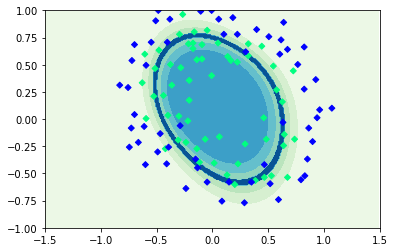

<Figure size 864x864 with 0 Axes>

In [5]:
import pandas as pd

def plot_SVM(kernel, C, const=0.0):
    dataset = pd.read_csv("../data/chips.csv")
    data_size = len(dataset)
    data_values = dataset.replace('P', 1).replace('N', -1).values.tolist()
    x, y = [], []
    x_coord = []
    y_coord = []
    for i in data_values:
        y.append(i[2])
        x.append(i[0:2])
        x_coord.append(i[0])
        y_coord.append(i[1])
    if kernel == "linear_kernel":
        K = main.get_kernel("linear_kernel")
    else:
        K = lambda x1, x2: main.get_kernel(kernel)(const, x1, x2)
    alphas, b = main.get_weights_final(K, data_size, C, 5, x, y)
    draw_plot(x_coord, y_coord, y, alphas, K, x, y, b)


plot_SVM("gauss_kernel", 1.0, 2)

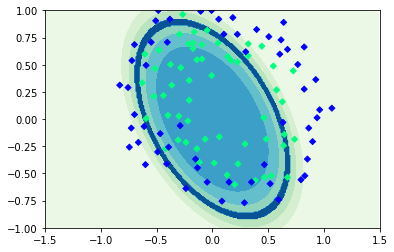

<Figure size 864x864 with 0 Axes>

In [6]:
plot_SVM("polynomial_kernel", 10, 2)

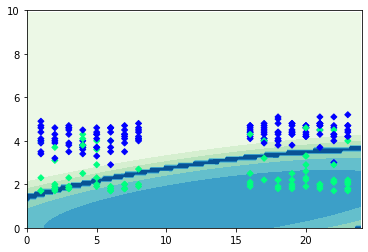

<Figure size 864x864 with 0 Axes>